In [1]:
from sklearn.datasets import load_boston
boston = load_boston()
# print(boston.DESCR)

In [2]:
boston.target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [16]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,test_size=0.25,random_state=33)
#分析回归目标值的差异
print('The max target value is ',np.max(boston.target))
print('The min target value is ',np.min(boston.target))
print('The average target value is ',np.mean(boston.target))

The max target value is  50.0
The min target value is  5.0
The average target value is  22.532806324110677


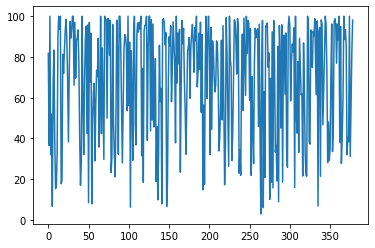

In [18]:
import matplotlib.pyplot as plt
plt.plot(X_train[:,6])

In [10]:
from sklearn.preprocessing import StandardScaler
#分别初始化对特征值和目标值的标准化器
ss_X = StandardScaler()
ss_y = StandardScaler()
#训练数据都是数值型，所以要标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)
#目标数据（房价预测值）也是数值型，所以也要标准化处理
#说明一下：fit_transform与transform都要求操作2D数据，而此时的y_train与y_test都是1D的，因此需要调用reshape(-1,1)，例如：[1,2,3]变成[[1],[2],[3]]
y_train = ss_y.fit_transform(y_train.reshape(-1,1))
y_test = ss_y.transform(y_test.reshape(-1,1))

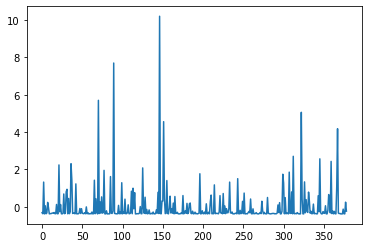

In [11]:
plt.plot(X_train[:,0])

(array([10., 30., 41., 36., 42., 38., 16., 19.,  3., 11.,  3.,  0., 86.,
         0., 21., 15.,  0.,  0.,  5.,  3.]),
 array([-1.52748473, -1.32625838, -1.12503203, -0.92380567, -0.72257932,
        -0.52135296, -0.32012661, -0.11890025,  0.0823261 ,  0.28355245,
         0.48477881,  0.68600516,  0.88723152,  1.08845787,  1.28968423,
         1.49091058,  1.69213694,  1.89336329,  2.09458964,  2.295816  ,
         2.49704235]),
 <BarContainer object of 20 artists>)

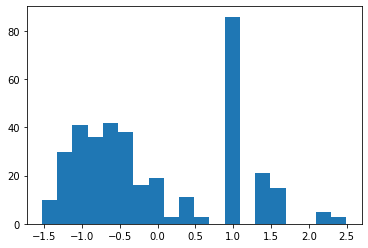

In [15]:
plt.hist(X_train[:,2],bins = 20)

In [4]:
#第四步：使用三种不同核函数配置的支持向量机回归模型进行训练，并且分别对测试数据进行预测
#从sklearn.svm中导入支持向量机回归模型SVR
from sklearn.svm import SVR
#1.使用线性核函数配置的支持向量机进行回归训练并预测
linear_svr = SVR(kernel='linear')
linear_svr.fit(X_train,y_train)
linear_svr_y_predict = linear_svr.predict(X_test)
#2.使用多项式核函数配置的支持向量机进行回归训练并预测
poly_svr = SVR(kernel='poly')
poly_svr.fit(X_train,y_train)
poly_svr_y_predict = poly_svr.predict(X_test)
#3.使用径向基核函数配置的支持向量机进行回归训练并预测
rbf_svr = SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)
rbf_svr_y_predict = rbf_svr.predict(X_test)

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
#第五步：对三种核函数配置下的支持向量机回归模型在相同测试集下进行性能评估
#使用R-squared、MSE、MAE指标评估
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
#1.线性核函数配置的SVR
print('R-squared value of linear SVR is',linear_svr.score(X_test,y_test))
print('the MSE of linear SVR is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(linear_svr_y_predict)))
print('the MAE of linear SVR is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(linear_svr_y_predict)))
#2.多项式核函数配置的SVR
print('R-squared value of Poly SVR is',poly_svr.score(X_test,y_test))
print('the MSE of Poly SVR is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(poly_svr_y_predict)))
print('the MAE of Poly SVR is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(poly_svr_y_predict)))
#3.径向基核函数配置的SVR
print('R-squared value of RBF SVR is',rbf_svr.score(X_test,y_test))
print('the MSE of RBF SVR is',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rbf_svr_y_predict)))
print('the MAE of RBF SVR is',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(rbf_svr_y_predict)))

R-squared value of linear SVR is 0.651717097429608
the MSE of linear SVR is 27.0063071393243
the MAE of linear SVR is 3.426672916872753
R-squared value of Poly SVR is 0.40445405800289286
the MSE of Poly SVR is 46.1794033139523
the MAE of Poly SVR is 3.75205926674149
R-squared value of RBF SVR is 0.7564068912273935
the MSE of RBF SVR is 18.888525000753493
the MAE of RBF SVR is 2.6075632979823276
